Zuallerst sehen wir uns Jupyter genauer an. Das hier ist Jupyter, die interaktive Notebook-Umgebung zum Programmieren. Wir sehen hier eine Zelle, in der wir Python-Code eingeben können. Geben wir einfach einmal einen String namens `"Hello World"` ein. Mit der Tastenkombination `Strg` + `Enter` können wir die Zelle ausführen.

In [1]:
"Hello World"

'Hello World'

Das Ergebnis ist sofort unter der Zelle sichtbar. Legen wir nun eine weitere Zelle an. Dies funktioniert mit dem Drücken der Taste `ESC` und einem darauffolgendem Buchstaben `b`.

Hier sehen wir gleich eine wichtige Eigenheit von Jupyter: Die Unterscheidung zwischen Befehlsmodus (erreichbar über Taste `Esc`) und dem Eingabemodus (erreichbar über die Taste `Enter`). Im Befehlsmodus ist die Umrahmung der aktuellen Zelle blau. Im Eingabemodus wird die Umrahmung grün. Gehen wir in den Befehlsmodus und drücken `m`. Dies ändert den Zelltyp. Die aktuelle Zelle ist nun eine Markdown-Zelle. Markdown ist eine einfache Markup-Sprache, mit der Text geschrieben und formatiert werden kann.

# Los geht's
* wir spielen mit Python
* danach nehmen wir uns Pandas vor

In [2]:
text = "Hello World!"
text[0]

'H'

In [3]:
text[-1]

'!'

In [4]:
text[2:5]

'llo'

In [5]:
text[:-1]

'Hello World'

In [6]:
text.upper()

'HELLO WORLD!'

In [7]:
text.split(maxsplit=2, sep=" ")

['Hello', 'World!']

In diesem Notebook wollen wir uns die Entwicklungsgeschichte des Spring Framework Beispielprojekts "Spring PetClinic" anhand der Historie des dazugehörigen Git-Repositories ein wenig genauer ansehen.

Das GitHub-Repository https://github.com/spring-projects/spring-petclinic wurde dafür über den Befehl  

```
https://github.com/spring-projects/spring-petclinic.git
```

auf die lokale Festplatte geklont.

Die für diese Auswertung relevanten Teile der Historie wurde mittels

```
git log --pretty="%ad,%aN" --no-merges > timestamp_author.csv
```
exportiert. Dieser Befehl liefert pro Commit des Git-Repositories den Zeitstempel des Commits (`%ad`) sowie den Namen des Autors (`%aN`). Die jeweiligen Werte sind kommasepariert. Wir geben zusätzlich mit an, dass wir reine Merge-Commits nicht erhalten wollen (über `--no-merges`). Das Ergebnis der Ausgabe speichern wir in die Datei `timestamp_author.csv`.

Nun können wir diese Daten mit Hilfe des Datenanalyse-Frameworks Pandas einlesen. Wir importieren dazu `pandas` mit der gängigen Abkürzung `pd` mittels der `import ... as ...` Syntax von Pyhton.

In [8]:
import pandas as pd

Ob das Importieren des Moduls auch wirklich funktioniert hat, können wir prüfen, in dem wir mit dem `pd`-Modul arbeiten. Dazu hängen wir an die `pd`-Variable den `?` Operator an und führen die Zelle aus. Es erscheint die Dokumentation des Moduls im unteren Bereich des Notebooks. Diesen Bereich können wir durchlesen und mit der Taste `ESC` auch wieder verschwinden lassen.

In [9]:
pd?

Danach lesen wir die oben beschriebene CSV-Datei `timestamp_author.csv` ein und speichern das Ergebnis in der Variable `git_log`. Neben dem Dateinamen müssen wir zusätzlich über das Argument `names` noch eine Liste an Namen für die Kopfzeile mitgeben, da unsere Git-Log-Datei keine entsprechende Kopfzeile besitzt.

Wir haben nun die Daten in einen `DataFrame` (so etwas ähnliches wie ein programmierbares Excel-Arbeitsblatt) geladen, der in unserem Fall aus zwei `Series` (in etwa Spalten) besteht. Auf den `DataFrame` können wir nun Operationen ausführen. Z. B. können wir uns mittels `head()` die fünf ersten Einträge anzeigen lassen.

In [10]:
git_log = pd.read_csv(
    "datasets/git_timestamp_author.csv",
    names=['timestamp', 'author'])
git_log.head()

,timestamp,author
0,Thu Feb 15 17:44:48 2018 +0100,Antoine Rey
1,Sat Nov 4 11:59:48 2017 +0100,Antoine Rey
2,Thu Feb 22 10:57:12 2018 +0100,Stephane Nicoll
3,Thu Feb 22 10:46:09 2018 +0100,Stephane Nicoll
4,Mon Feb 5 19:19:38 2018 +0100,Ray Tsang


Als nächstes rufen wir `info()` auf den `DataFrame` auf, um einige Eckdaten über die eingelesenen Daten zu erhalten.

In [11]:
git_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 2 columns):
timestamp    527 non-null object
author       527 non-null object
dtypes: object(2)
memory usage: 8.3+ KB


Den Zugriff auf die einzelnen Series können wir mittels der Schreibeweise `[<spaltenname>]` oder (in den meisten Fällen) per direkter Nutzung des Namens der `Series` erreichen.

In [12]:
git_log.author.head()

0        Antoine Rey
1        Antoine Rey
2    Stephane Nicoll
3    Stephane Nicoll
4          Ray Tsang
Name: author, dtype: object

Auch auf einer `Series` selbst können wir verschiedene Operationen ausführen. Z. B. können wir mit `value_counts()` die in einer `Series` enthaltenen Werte zählen lassen. Hängen wir zusätzlich ein `head(10)` an, so erhalten wir eine schnelle Möglichkeit, die TOP-10-Werte einer `Series` anzeigen zu lassen. Das Ergebnis können wir dann in einer Variable `top10` festhalten und ausgeben lassen, in dem wir die Variable in die nächste Zellenzeile schreiben.

In [13]:
top10 = git_log.author.value_counts().head(10)
top10

Michael Isvy          258
Antoine Rey           100
Keith Donald           35
Costin Leau            28
Dave Syer              25
Stephane Nicoll         8
Dapeng                  6
Tomas Repel             5
Thibault Duchateau      5
Gordon Dickens          5
Name: author, dtype: int64

## Plotten/Visualisierung
Als nächstes wollen wir das Ergebnis visualisieren bzw. plotten. Um die das Plot-Ergebnis der intern verwendeten Plotting-Bibliothek `matplotlib` direkt im Notebook anzuzeigen, müssen wir Jupyter dies mit dem Magic-Kommando

```
%matplotlib inline
```

vor dem Aufruf der `plot()` Methode mitteilen.

Standardmäßig wird beim Aufruf von `plot()` auf einen `DataFrame` oder einer `Series` ein Liniendiagramm erstellt.

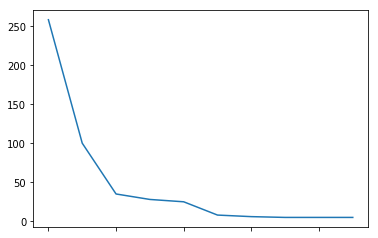

In [14]:
%matplotlib inline
top10.plot()

Das macht hier wenig Sinn, weshalb wir mittels einer Untermethode von `plot` namens `bar()` ein Balkendiagramm erzeugen lassen. 

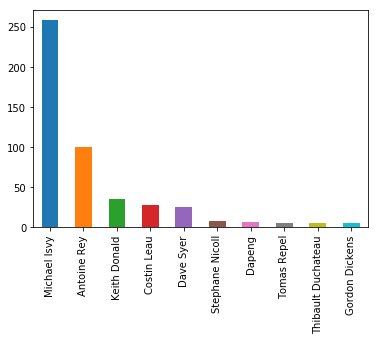

In [15]:
top10.plot.bar()

Für diese Daten bietet sich auch eine Visualisierung als Tortendiagramm an. Hierfür rufen wir statt `bar()` die Methode `pie()` auf.

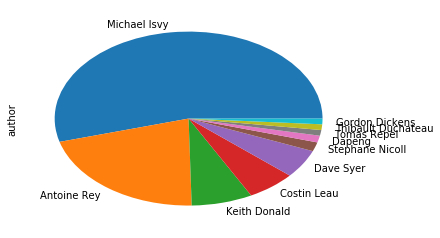

In [16]:
top10.plot.pie()

Das Diagramm sieht hier jedoch nicht sehr schön aus.

Mit den optionalen Styling-Parametern können wir erreichen, dass wir eine schönere Grafik angezeigt bekommen. Wir verwenden dazu
* `figsize=[7,7]` als Größenangabe
* `title="Top 10 Autoren"` als Titel
* `labels=None`, um die überflüssige Beschriftung nicht anzuzeigen.

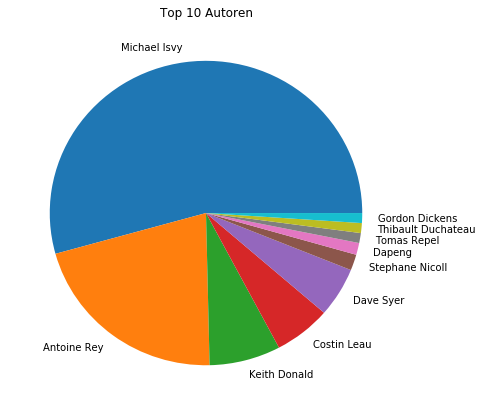

In [17]:
top10.plot.pie(
    figsize=[7,7],
    title="Top 10 Autoren",
    label="")

## Extraktion von Informationen
Nun widmen wir uns den Zeitstempelangaben. Wir wollen anhand dieser ungefähr herausfinden, wo die meisten Entwickler wohnen. Dazu extrahieren wir die Informationen über den Zeitstempel in `timestamp` in eine neue Spalte/Series mittels der `split()`-Funktion, welche uns von den `str` / String-Funktionen einer Series bereitgestellt wird. Die `split()`-Funktion benötigt als erstes, optionales Argument das Trennzeichen (standardmäßig ist dies das Leerzeichen) zur Trennung des Strings. Zusätzlich geben wir mit `expand=True` mit, dass wir als Rückgabewert einen `DataFrame` haben möchten. Damit können wir mit Hilfe der Selektion einer beliebigen Spalte den für uns interessanten Teil des `DataFrame`s auswählen (in unserem Fall `[5]`).

In [18]:
git_log.timestamp.head()

0    Thu Feb 15 17:44:48 2018 +0100
1     Sat Nov 4 11:59:48 2017 +0100
2    Thu Feb 22 10:57:12 2018 +0100
3    Thu Feb 22 10:46:09 2018 +0100
4     Mon Feb 5 19:19:38 2018 +0100
Name: timestamp, dtype: object

In [19]:
git_log.timestamp.str.split().str[5].head()

0    +0100
1    +0100
2    +0100
3    +0100
4    +0100
Name: timestamp, dtype: object

In [20]:
git_log.timestamp.str.split().str[5].head()

0    +0100
1    +0100
2    +0100
3    +0100
4    +0100
Name: timestamp, dtype: object

In [21]:
git_log['timezone'] = git_log.timestamp.str.split().str[5]
git_log.head()

,timestamp,author,timezone
0,Thu Feb 15 17:44:48 2018 +0100,Antoine Rey,+0100
1,Sat Nov 4 11:59:48 2017 +0100,Antoine Rey,+0100
2,Thu Feb 22 10:57:12 2018 +0100,Stephane Nicoll,+0100
3,Thu Feb 22 10:46:09 2018 +0100,Stephane Nicoll,+0100
4,Mon Feb 5 19:19:38 2018 +0100,Ray Tsang,+0100


Analog zu den TOP 10 Autoren können wir nun die TOP 10 Zeitzonen ausgeben lassen.

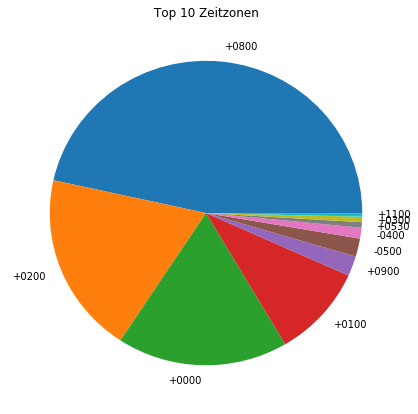

In [22]:
git_log.timezone.value_counts().head(10).plot.pie(
    figsize=[7,7],
    title="Top 10 Zeitzonen",
    label="")

## Arbeiten mit Datumsangaben
Bevor wir in die Welt der Zeitreihenverarbeitung einsteigen können, müssen wir unsere Spalte mit den Datumsangabe zuerst in den passenden Datentyp umwandeln. Zurzeit ist unsere Spalte `timestamp` noch ein String, also von textueller Natur. Wir können dies sehen, in dem wir uns mittels der Helferfunktion `type(<object>)` den ersten Eintrag der `timestamp`-Spalte anzeigen lassen:

In [23]:
type(git_log.timestamp[0])

str

Pandas konvertiert standardmäßig automatisch die Zeitzonen, damit wir uns um nichts mehr kümmern müssen. In unserem Fall ist das aber schlecht, da wir die jeweilige lokale Zeit eines Commits erhalten wollen. Daher schneiden wir kurzerhand die Angabe über die Zeitzone ab. Mittels der `str`-Funktion und dem passenden Selektor `[:-6]` können wir das einfach bewerkstelligen.

In [24]:
git_log.timestamp.str[:-6].head()

0    Thu Feb 15 17:44:48 2018
1     Sat Nov 4 11:59:48 2017
2    Thu Feb 22 10:57:12 2018
3    Thu Feb 22 10:46:09 2018
4     Mon Feb 5 19:19:38 2018
Name: timestamp, dtype: object

In [25]:
git_log['timestamp_local'] = pd.to_datetime(git_log.timestamp.str[:-6])
git_log.head()

,timestamp,author,timezone,timestamp_local
0,Thu Feb 15 17:44:48 2018 +0100,Antoine Rey,+0100,2018-02-15 17:44:48
1,Sat Nov 4 11:59:48 2017 +0100,Antoine Rey,+0100,2017-11-04 11:59:48
2,Thu Feb 22 10:57:12 2018 +0100,Stephane Nicoll,+0100,2018-02-22 10:57:12
3,Thu Feb 22 10:46:09 2018 +0100,Stephane Nicoll,+0100,2018-02-22 10:46:09
4,Mon Feb 5 19:19:38 2018 +0100,Ray Tsang,+0100,2018-02-05 19:19:38


Beim Umwandeln von Datantypen hilft uns Pandas natürlich. Die Funktion `pd.to_datetime` nimmt als ersten Parameter eine `Series` mit Datumsangaben entgegen und wandelt diese um. Als Rückgabewert erhalten wir entsprechend eine `Series` vom Datentype `Timestamp`. Die Umwandlung funktioniert für die meisten textuellen Datumsangaben auch meistens automagisch, da Pandas mit unterschiedlichesten Datumsformaten umgehen kann.

Ob die Umwandlung erfolgreich war, können wir mit einem nochmaligen Aufruf von `type()` auf den ersten Wert der Spalte `timestamp` überprüfen.

In [26]:
git_log.timestamp = pd.to_datetime(git_log.timestamp)
type(git_log.timestamp[0])

pandas._libs.tslib.Timestamp

In [27]:
git_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 4 columns):
timestamp          527 non-null datetime64[ns]
author             527 non-null object
timezone           527 non-null object
timestamp_local    527 non-null datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 16.5+ KB


In [28]:
git_log.timestamp_local.dt.hour.head()

0    17
1    11
2    10
3    10
4    19
Name: timestamp_local, dtype: int64

In [29]:
commits_je_stunde = git_log.timestamp_local.dt.hour.value_counts(sort=False)
commits_je_stunde.head()

0    2
1    5
2    2
3    2
5    1
Name: timestamp_local, dtype: int64

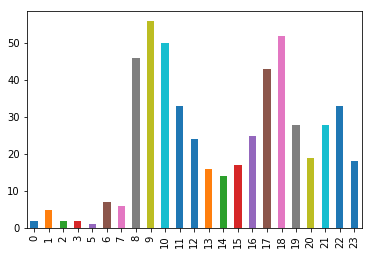

In [30]:
commits_je_stunde.plot.bar()

Wir beschriften nun zusätzlich die Grafik. Dazu speichern wir uns das Rückgabeobjekt der `bar()`-Funktion in der Variable `ax`. Hierbei handelt es sich um ein `Axes`-Objekt der darunterliegenden Plotting-Bibliothek `matplotlib`, durch das wir zusätzliche Eigenschaften des Plots beliebig anpassen können. Wir setzen hier

* den Titel über `set_title(<titelname>)`
* die Beschriftung der X-Achse mit `set_xlabel(<x_achsenname>)` und
* die Beschriftung der Y-Achse mit `set_ylabel<y_achsenname>)`

Als Ergebnis erhalten wir nun ein ausagekräftiges, beschriftetes Balkendiagramm.

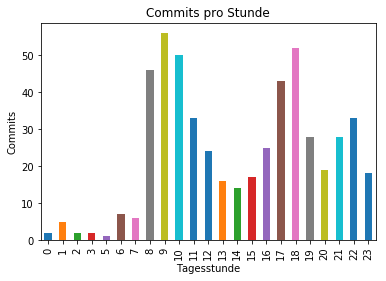

In [31]:
ax = commits_je_stunde.plot.bar()
ax.set_title("Commits pro Stunde")
ax.set_xlabel("Tagesstunde")
ax.set_ylabel("Commits")

Wir können auch nach Wochentagen auswerten. Dazu verwenden wir das `weekday`-Attribut auf dem `DateTime`-Attribut `dt`. Wie üblich, lassen wir hier die Werte über `value_counts` zählen, lassen die Werte aber nicht der Größe nach sortieren.

In [32]:
commits_je_wochentag = git_log.timestamp_local.dt.weekday.value_counts(sort=False)
commits_je_wochentag

0     80
1     75
2    104
3     92
4     97
5     51
6     28
Name: timestamp_local, dtype: int64

Das Ergebnis in `commits_je_wochentag` lassen wir als ein Balkendiagramm mittels `plot.bar()` ausgeben.

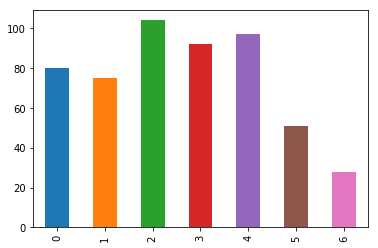

In [33]:
commits_je_wochentag.plot.bar()

## Commit-Verlauf
Nachfolgend wollen wir den Verlauf aller Commits über die letzten Jahre aufzeichnen lassen. Dazu setzen wir die `timestamp` Spalte als Index mittels `set_index(<spaltenname>)`. Zudem selektieren wir lediglich die `author`-Spalte mittels `[<spaltenname>]`. Dadurch arbeiten wir fortlaufend auf einer reinen `Series` statt eines `DataFrame`. Randnotiz: Die Verarbeitung mittels `Series` folgt fast analog wie bei einem `DataFrame`. Eine `Series` wird jedoch nicht so schön in einer Tabelle formatiert angezeigt, weshalb ich persönlich die Bearbeitung mittels `DataFrame` bevorzuge.

In [34]:
git_timed = git_log.set_index('timestamp')['author']
git_timed.head()

timestamp
2018-02-15 16:44:48        Antoine Rey
2017-11-04 10:59:48        Antoine Rey
2018-02-22 09:57:12    Stephane Nicoll
2018-02-22 09:46:09    Stephane Nicoll
2018-02-05 18:19:38          Ray Tsang
Name: author, dtype: object

Über die `resample(<zeiteinheit>)`-Funktion des `DataFrame`s können wir nun Werte nach bestimmten Zeiteinheiten gruppieren wie z. B. nach Tage (`D`), Monate (`M`), Quartale (`Q`) oder Jahre (`A`). Wir verwenden hier ein `resample("D")` für tageweises zählen. Zudem geben wir noch an, wie die Einzelwerte pro Zeiteinheit zusammengeführt werden sollen. Hierzu wählen wir die `count()`-Funktion, um die Anzahl der Commits für jeden einzelnen Tag zu zählen.

In [35]:
commits_per_day = git_timed.resample("D").count()
commits_per_day.head()

timestamp
2009-05-05     5
2009-05-06    10
2009-05-07     1
2009-05-08     0
2009-05-09     0
Freq: D, Name: author, dtype: int64

Um den Commit-Verlauf über die Jahre hinweg aufzuzeigen, bilden wir die kumulative Summe über alle Tageseinträge mittels `cumsum()`. Damit werden alle Werte nacheinander aufsummiert.

In [36]:
commits_pro_tag_kumulativ = commits_per_day.cumsum()
commits_pro_tag_kumulativ.head()

timestamp
2009-05-05     5
2009-05-06    15
2009-05-07    16
2009-05-08    16
2009-05-09    16
Freq: D, Name: author, dtype: int64

Das Ergebnis plotten wir nun als Liniendiagramm und erhalten somit die Anzahl der Commits über die Jahre hinweg aufgezeichnet.

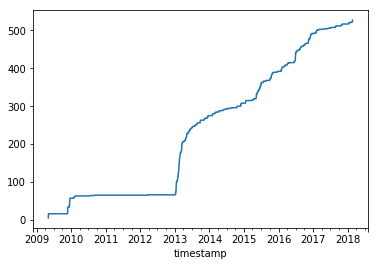

In [37]:
commits_pro_tag_kumulativ.plot()

## Was noch fehlt
Wir haben jetzt einige Grundlagen zu Pandas kennengelernt. Die anderen wichtigen Themenbereiche, die nun noch fehlen, sind:
* Einlesen komplizierter Datenstrukturen
* Bereinigung von schlechter Datenqualität
* Zusammenführen verschiedener Datenquellen
* Gruppieren von gleichartigen Daten mittels `groupby`
* Umformen von `DataFrame`s mittels `pivot_table`